In [50]:
# IMPORTING

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# CREATING A DATAFRAME AND READING THE DATA

df = pd.read_csv('C:/Users/LENOVO/Desktop/Loan.csv')

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# CLEANING AND FILLING MISSING VALUES IN CSV FILE

# CHECKS IF VALUE IS MISSING THIS THROWS TRUE

df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# TOTAL NUMBER OF MISSING VALUES INSIDE EACH COLUMN

total = df.isnull().sum()

total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# FIRST LETS DEAL WITH THE GENDER COLUMN

# LETS HAVE A LOOK AT NO OF MALE AND FEMALE IN THIS COLUMN

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
# NOW ITS CLEAR THAT NO OF MALES IS MAJORITY THUS FILL THE MISSING CELLS WITH MALE

df.Gender = df.Gender.fillna('Male')

In [7]:
# SAME STEPS FOR MARRIED COLUMN

df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
df.Married = df.Married.fillna('Yes')

In [9]:
# SAME WITH DEPENDENTS

df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df.Dependents = df.Dependents.fillna('0')

In [11]:
# SAME WITH SELF EMPLOYED

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [13]:
# FOR LOAN AMOUNT WE USE MEAN

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

print(df.LoanAmount.mean())

146.41216216216213


In [14]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360) 
# BY MISTAKE I REPLACED EMPTY BLOCKS BY 512 INSTEAD OF 360 SO NOW I USE REPLACE TO CHANGE IT 

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [23]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [24]:
total = df.isnull().sum()
total

# SO WE ARE DONE WITH CLEANING AND REPLACING

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
# CONVERTING CATEGORICAL VARIABLES TO NUMERIC

# LABEL ENCODING

# FIRST CREATE A LIST OF COLUMNS HAVING CATEGORICAL VARIABLES

var = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

# LABELENCODING MODEL

le = LabelEncoder()

for i in var:
    df[i] = le.fit_transform(df[i])

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [27]:
# DIVIDING THE COLUMNS INTO DEPENDENT AND INDEPENDENT VARIABLES

X = df.iloc[:,1:12]  # EXCLUDING LOAN_ID
Y = df.iloc[:,12]

In [30]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [32]:
# SPLITTING THE DATA TO TEST AND TRAIN SET

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [35]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,0,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,0,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,0,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,0,0,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
337,1,1,2,0,1,2500,4600.0,176.0,360.0,1.0,0
376,1,1,3,0,0,8750,4996.0,130.0,360.0,1.0,0
278,1,1,0,0,0,14583,0.0,436.0,360.0,1.0,1
466,1,1,3,1,0,2947,1664.0,70.0,180.0,0.0,2


In [37]:
# DECISION TREE MODEL

model = DecisionTreeClassifier()

model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
# PREDICTIONS

Y_predictions = model.predict(X_test)

Y_predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
Y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

In [42]:
# EVALUATION

cnfmatrix = metrics.confusion_matrix(Y_test,Y_predictions)

cnfmatrix

array([[17, 16],
       [25, 65]], dtype=int64)

In [43]:
# ACCURACY

print('Accuracy:' , metrics.accuracy_score(Y_test,Y_predictions))

Accuracy: 0.6666666666666666


In [45]:
# NOW LETS USE LOGISTIC REGRESSION AND SEE IF IT CAN PRODUCE SOME BETTER ACCURACY

model2 = LogisticRegression()

model2.fit(X_train , Y_train) #IGNORE WARNING

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
Y_predictions2 = model2.predict(X_test)

Y_predictions2

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [48]:
Y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int32

In [49]:
cnfmatrix2 = metrics.confusion_matrix(Y_test,Y_predictions2)

cnfmatrix2

array([[15, 18],
       [ 2, 88]], dtype=int64)

In [51]:
print('Accuracy:' , metrics.accuracy_score(Y_test,Y_predictions2))

Accuracy: 0.8373983739837398


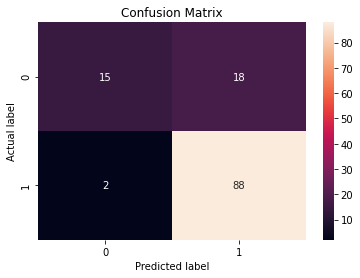

In [52]:
# HEATMAP

sb.heatmap(cnfmatrix2,annot=True) # ANNOT SHOW NUMBERS ON COLORS

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

<AxesSubplot:>

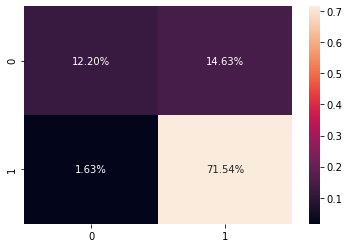

In [53]:
# SAME BUT WITH PERCENTAGE

sb.heatmap(cnfmatrix2/np.sum(cnfmatrix2),annot=True,fmt='.2%')  # fmt is string formating

In [56]:
# THUS LR MODEL HAS BETTER ACCURACY 

# NOW LETS PREDICT WITH UNKNOWN DATA

loanstatus = model2.predict([[1,1,1,0,0,8000,2000,130,24,0.0,2]])

if(loanstatus==1):
    print('Loan is approved! Congrats')
else:
    print('Sorry, the loan is not approved!')

Loan is approved! Congrats
